<a href="https://colab.research.google.com/github/ranaberi/ranaberi.github.io/blob/main/Copy_of_Copy_of_breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns

# Download dataset from Kaggle

In [ ]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']='ranaberi'
os.environ['KAGGLE_KEY']='27c0f171dbad41d86b52db9853713269'

In [ ]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


# Load & Explore Data

In [ ]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [ ]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#count of rows and columns
df.shape

(569, 33)

In [ ]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop the column with null values
df.dropna(axis=1, inplace=True)

In [ ]:
# count of rows and columns
df.shape

(569, 32)

In [ ]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [ ]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)

In [ ]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [ ]:
#Splitting the dataset into independent and dependent datasets 
x=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [ ]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [ ]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#print data
x_train

array([[-0.34346817, -0.69504124, -0.38324014, ..., -0.85248345,
         1.09549202, -0.75024415],
       [-0.34631839, -1.3504886 , -0.36506964, ...,  0.01927278,
        -0.84897979,  0.04852881],
       [-0.51448134,  2.42570464, -0.58807124, ..., -1.72575053,
        -0.80601683, -0.92114191],
       ...,
       [-0.16390435, -1.48883562, -0.24654842, ..., -1.39185429,
        -1.03197019, -1.21632897],
       [ 0.46599415, -1.21214158,  0.42699902, ...,  0.35014733,
        -0.3063735 , -0.74542258],
       [ 0.12966826,  0.01483773,  0.10695042, ..., -0.27624805,
        -0.70736114, -0.53541654]])

# Build a Logistic Regression Model

In [ ]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#make use of trained model to make predictions on test data
predictions= classifier.predict(x_test)

# Performance Evaluation

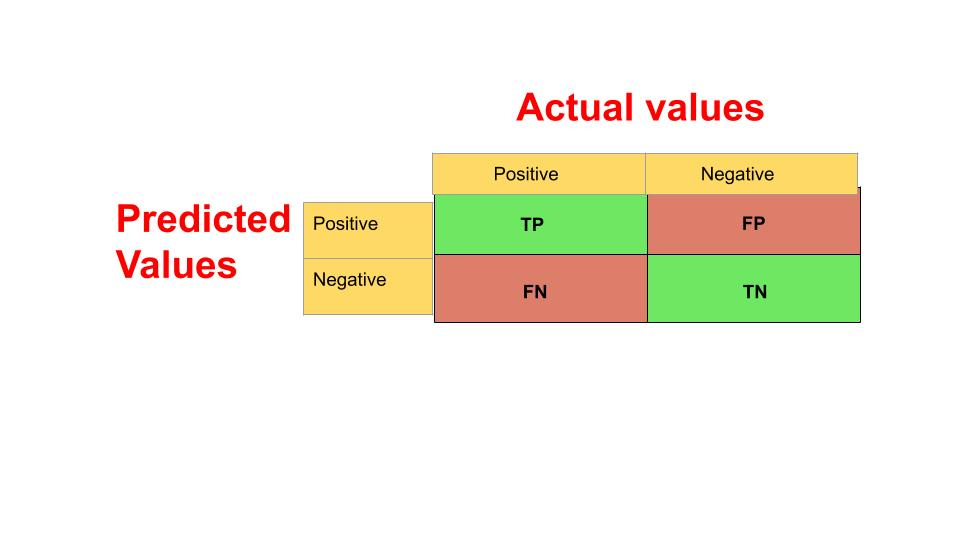

[[90  1]
 [ 2 50]]


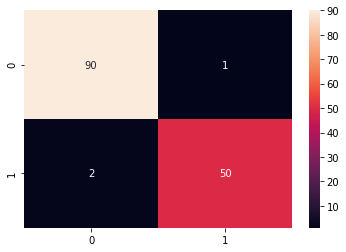

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print("Accuracy obtained by Logistic Regression model:",accuracy_score(y_test,predictions))

Accuracy obtained by Logistic Regression model: 0.9790209790209791


In [ ]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.predict(x_test)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

[[87  4]
 [ 4 48]]


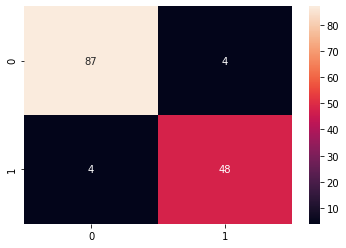

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,model.predict(x_test))
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
RandomForestClassifierScore = model.score(x_test,y_test)

In [ ]:
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore)

Accuracy obtained by Random Forest Classifier model: 0.9440559440559441


In [ ]:
# Train Support Vector Classifier
from sklearn.svm import SVC
SVCModel = SVC(kernel='rbf', max_iter=100, C=1.0,gamma='auto')
svm_pred = SVCModel.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[[90  1]
 [ 5 47]]


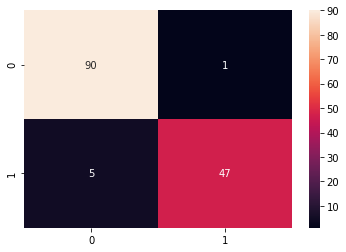

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,svm_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print("Accuracy obtained by Support Vector Classifier model:",accuracy_score(svm_pred,predictions))

Accuracy obtained by Support Vector Classifier model: 0.965034965034965


In [ ]:
# Train Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()
gnb_pred = GaussianNBModel.fit(x_train, y_train).predict(x_test)

[[82  9]
 [ 7 45]]


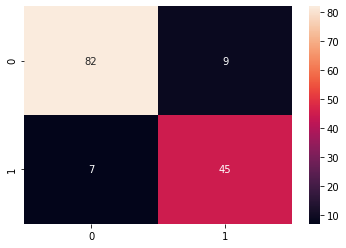

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,gnb_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print("Accuracy obtained by Naive Bayes Classifier model:",accuracy_score(gnb_pred,predictions))

Accuracy obtained by Naive Bayes Classifier model: 0.9090909090909091


In [ ]:
#NN
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
#print(os.listdir("../input")
dataset = pd.read_csv('/content/data.csv')
d = {'M':1,'B':0}
dataset = dataset.replace(d) #replace M/B with 0 or 1 for the neural net classification
dataset = dataset.drop(['Unnamed: 32'],axis=1) #remove column 32 - unknown purpose
dataset = dataset.drop(['id'],axis=1) #remove the id - not needed for the neural net
dataset_temp = dataset.drop(['diagnosis'],axis=1) #make a temporary dataset with only our feature vectors
X = np.array(dataset_temp).T #create our Numpy array of feature vectors to be used in our neural net
Y = np.array(dataset['diagnosis']).T #create our Numpy array of diagnosis to be used in our neural net
Y = Y.reshape(1,569)
#Now, let's normalized our feature vector.  We will force the mean of each column to 0, and divide by the maximum
X_mean = np.mean(X,axis=1,keepdims=True) #Find the mean of each feature
X_max = np.max(X,axis=1,keepdims=True) #Find the maximum of each feature
X_normalized = (X-X_mean)/(X_max) #Normalizing our dataset by subtracting the mean and dividing by the max
#Now, let's split our dataset into two segments
# 1) Training set to train our neural net
# 2) A cross validation set to test the accuracy of our neural net

#We'll take the first 380 samples for our training set
X_train = X_normalized[:,:380]
Y_train = Y[:,:380]

#We will take the remaining 189 for our cross-validation set
X_cv = X_normalized[:,381:]
Y_cv = Y[:,381:]
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
def tanh(z):
    s = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return s

In [ ]:
def forward_prop(X,W1,W2,W3,b1,b2,b3):
    
    #First layer forward propogation
    Z1 = np.dot(W1,X)
    A1 = tanh(Z1 + b1)
    #Second layer forward propogation
    Z2 = np.dot(W2,A1)
    A2 = tanh(Z2 + b2)
    #Third layer forward propogation
    Z3 = np.dot(W3,A2)
    A3 = sigmoid(Z3 + b3) #A3 will produce our probability vector
    
    cache = {    
                  "Z1": Z1,
                  "A1": A1,
                  "Z2": Z2,
                  "A2": A2,
                  "Z3": Z3,
                  "A3": A3
            }
    return cache

In [ ]:
def gradient_descent(iterations,X,Y,alpha):
    
    #Randomly initialized our parameters before running the algorithm
    W1 = np.random.randn(3,30)*0.01
    b1 = np.random.rand(3,1)
    W2 = np.random.randn(2,3)*0.01
    b2 = np.random.rand(2,1)
    W3 = np.random.rand(1,2)*0.01
    b3 = np.random.rand(1,1)
    dummy,m = X.shape
    
    caches = [] #we will store our cost at each iteration in this array
    count_vector = [] #We will store our iteration count in this array
    count = 0
    for i in range (1,iterations):
        
            count = count + 1
            
            count_vector.append(count)
        
            params = forward_prop(X,W1,W2,W3,b1,b2,b3) #forward propogation using our parameters
            
            #Define our values to be used in back propogation using the dictionary of values created from running forward_prop
            Z1 = params['Z1']
            Z2 = params['Z2']
            Z3 = params['Z3']
            A1 = params['A1']
            A2 = params['A2']
            A3 = params['A3']
            #Define our cost function, append the cost of each iteration to caches
            cost = -(1 / m)*np.sum(np.multiply(Y,np.log(A3)) + np.multiply((1-Y),np.log(1-A3)))
            caches.append(cost)
            
            #Back propogation for layer 3
            dA3 = -Y/A3 + (1-Y)/(1-A3)
            dZ3 = dA3 * sigmoid(Z3)*(1-sigmoid(Z3))
            dW3 = (1 / m)*np.dot(dZ3,A2.T)
            db3 = (1 / m)*np.sum(dZ3,axis=1,keepdims=True)
            
            #Back propogation for layer 2
            dA2 = np.dot(W3.T,dZ3)
            dZ2 = dA2*(1-np.power(tanh(Z2),2))
            dW2 = (1 / m)*np.dot(dZ2,A1.T)
            db2 = (1 / m)*np.sum(dZ2,axis=1,keepdims=True)
            #Back propogation for layer 1
            dA1 = np.dot(W2.T,dZ2)
            dZ1 = dA1*(1-np.power(tanh(Z1),2))
            dW1 = (1 / m)*np.dot(dZ1,X.T)
            db1 = (1 / m)*np.sum(dZ1,axis=1,keepdims=True)
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            W1 = W1 - alpha*dW1
            W2 = W2 - alpha*dW2
            W3 = W3 - alpha*dW3
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            b1 = b1 - alpha*db1
            b2 = b2 - alpha*db2
            b3 = b3 - alpha*db3
        
    return W1,W2,W3,b1,b2,b3,count_vector,caches

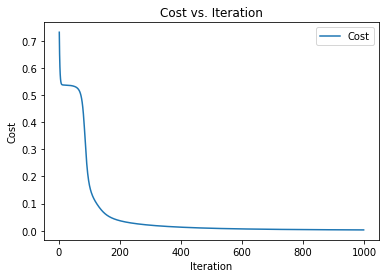

In [ ]:
W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(1000,X_cv,Y_cv,0.5)

plt.plot(count,caches,label='Cost')

plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.title("Cost vs. Iteration")

plt.legend()

plt.show()

In [ ]:
def predict(X,Y,iterations,alpha,X_train,Y_train):

    W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(iterations,X_train,Y_train,alpha)
    
    Z1 = np.dot(W1,X)
    A1 = tanh(Z1 + b1)
    Z2 = np.dot(W2,A1)
    A2 = tanh(Z2 + b2)
    Z3 = np.dot(W3,A2)
    A3 = sigmoid(Z3 + b3)
    
    dummy,m = A3.shape
    Y_prediction = np.zeros((1, m))
    
    for i in range(m):
        
        Y_prediction[0, i] = 1 if A3[0, i] > 0.5 else 0
        
    return Y_prediction

In [ ]:
#Lets see how accurate the predictions made by our neural network are compared to the training set and cross validation set
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(X_train,Y_train,1000,0.5,X_train,Y_train) - Y_train)) * 100))
print("Cross validation accuracy: {} %".format(100 - np.mean(np.abs(predict(X_cv,Y_cv,1000,0.5,X_train,Y_train) - Y_cv)) * 100))

Train accuracy: 98.94736842105263 %
Cross validation accuracy: 97.34042553191489 %


In [ ]:
dummy,m1 = X_train.shape
dummy,m2 = X_cv.shape

train_predict = predict(X_train,Y_train,1000,0.5,X_train,Y_train)
CV_predict = predict(X_cv,Y_cv,1000,0.5,X_train,Y_train)
count_true_pos = 0
count_train_pos = 0

count_true_pos_cv = 0
count_cv_pos = 0

for i in range (1,m1):
    if train_predict[0,i] == 1 and Y_train[0,i] == 1:
        count_true_pos = count_true_pos + 1
    if Y_train[0,i] == 1:
        count_train_pos = count_train_pos + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 1 and Y_cv[0,i] == 1:
        count_true_pos_cv = count_true_pos_cv + 1
    if Y_cv[0,i] == 1:
        count_cv_pos = count_cv_pos + 1
print(str(count_true_pos) + " positives predicted on the training set")
print(str(count_train_pos) + " true positives are in the training set")
print("The accuracy of true positives on the training set is: {} %".format(100-np.abs(100*((count_true_pos - count_train_pos)/count_train_pos))))
print("----------------------------------------------------------------")
print(str(count_true_pos_cv) + " positives predicted on the cross validation set")
print(str(count_cv_pos) + " true positives are in the cross validation set")
print("The accuracy of true positives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_pos_cv - count_cv_pos)/count_true_pos_cv))))


166 positives predicted on the training set
168 true positives are in the training set
The accuracy of true positives on the training set is: 98.80952380952381 %
----------------------------------------------------------------
43 positives predicted on the cross validation set
43 true positives are in the cross validation set
The accuracy of true positives on the cross validation set is: 100.0 %


In [ ]:
count_true_neg = 0
count_train_neg = 0

count_true_neg_cv = 0
count_cv_neg = 0

for i in range (1,m1):
    if train_predict[0,i] == 0 and Y_train[0,i] == 0:
        count_true_neg = count_true_neg + 1
    if Y_train[0,i] == 0:
        count_train_neg = count_train_neg + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 0 and Y_cv[0,i] == 0:
        count_true_neg_cv = count_true_neg_cv + 1
    if Y_cv[0,i] == 0:
        count_cv_neg = count_cv_neg + 1
print(str(count_true_neg) + " negatives predicted on the training set")
print(str(count_train_neg) + " true negatives are in the training set")
print("The accuracy of true negatives on the training set is: {} %".format(100-np.abs(100*((count_true_neg - count_train_neg)/count_train_neg))))
print("----------------------------------------------------------------")
print(str(count_true_neg_cv) + " negatives predicted on the cross validation set")
print(str(count_cv_neg) + " true negatives are in the cross validation set")
print("The accuracy of true negatives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_neg_cv - count_cv_neg)/count_true_neg_cv))))

210 negatives predicted on the training set
211 true negatives are in the training set
The accuracy of true negatives on the training set is: 99.5260663507109 %
----------------------------------------------------------------
138 negatives predicted on the cross validation set
144 true negatives are in the cross validation set
The accuracy of true negatives on the cross validation set is: 95.65217391304348 %
